In [39]:
sample = """\
Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II
"""

In [40]:
import re
pat = re.compile('Valve ([A-Z]{2}) has flow rate=([0-9]+); tunnels? leads? to valves? ([ ,A-Z]+)')
P = dict()
for i,l in enumerate(sample.splitlines()):
    g = pat.search(l)
    P[g[1]] = (i, int(g[2]), g[3].split(", "))


In [42]:
import networkx as nx
G = nx.DiGraph()
for (k,(i,o,V)) in P.items():
    for v in V:
        G.add_edge(k,v) #,label=str(i))

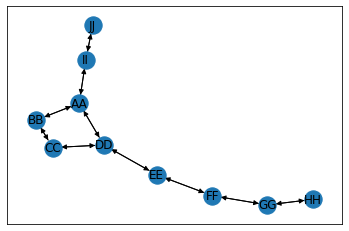

In [43]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels=True)
plt.draw()